<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-18403-1659684750/blob/main/Assignment_3/Bhuvaneswari/Bhuvaneswari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Build CNN Model for Classification of Flowers**

1)Download the Dataset and Unzip the file

In [ ]:
!unzip "/content/Flowers-Dataset.zip"

Archive:  /content/Flowers-Dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Flowers-Dataset.zip or
        /content/Flowers-Dataset.zip.zip, and cannot find /content/Flowers-Dataset.zip.ZIP, period.


In [5]:
!unzip "/content/drive/MyDrive/Flowers-Dataset.zip"

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

2)Image Augmentation

In [6]:
# Import required lib

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Creating augmentation on training variable
train_datagen = ImageDataGenerator(rescale=1./255 , zoom_range = 0.2 , horizontal_flip=True,vertical_flip=True)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import splitfolders
input_folder = "/content/flowers"

In [11]:
splitfolders.ratio(input_folder,output='/content/flowers',
                   ratio=(.8,0,.2),
                   group_prefix=None)

Copying files: 4317 files [00:01, 3210.24 files/s]


In [12]:
x_train=train_datagen.flow_from_directory("/content/flowers/test",
                                          target_size=(64,64),
                                          class_mode='categorical',
                                          batch_size=19)

Found 865 images belonging to 5 classes.


In [13]:
x_test=test_datagen.flow_from_directory("/content/flowers/train",
                                        target_size=(64,64),
                                        class_mode='categorical',
                                        batch_size=19)

Found 3452 images belonging to 5 classes.


In [14]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

3)Create Model

In [15]:
# Importing required lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [16]:
model=Sequential()

4)Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [17]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

5)Compile The Model

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
len(x_train)
len(x_test)

182

In [22]:
1238/24


51.583333333333336

In [23]:
326/24


13.583333333333334

**6)Fit The Model**

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),
                    validation_data=x_test,
                    validation_steps=len(x_test),
                    epochs=20)

**7)Save The Model**

In [50]:
model.save('flowers.h6')


**8)Test The Model**

In [51]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [52]:
model.save('flowers.h6')

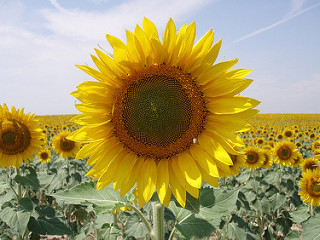

In [53]:
img1 = image.load_img('/content/flowers/sunflower/1022552002_2b93faf9e7_n.jpg') # Reading Image
img1 # Visualize the image

In [54]:
x=image.img_to_array(img1)
x  # Converting image to array

array([[[192., 201., 232.],
        [195., 204., 233.],
        [196., 206., 233.],
        ...,
        [153., 176., 210.],
        [151., 174., 208.],
        [150., 172., 209.]],

       [[192., 201., 230.],
        [195., 205., 232.],
        [197., 207., 234.],
        ...,
        [154., 174., 207.],
        [156., 176., 209.],
        [156., 176., 209.]],

       [[194., 204., 229.],
        [197., 207., 232.],
        [198., 208., 233.],
        ...,
        [155., 174., 206.],
        [155., 174., 206.],
        [159., 175., 208.]],

       ...,

       [[ 98., 121.,  93.],
        [ 60.,  80.,  52.],
        [ 83., 104.,  71.],
        ...,
        [143., 158., 125.],
        [142., 157., 124.],
        [145., 160., 127.]],

       [[147., 176., 146.],
        [ 90., 119.,  88.],
        [114., 140., 105.],
        ...,
        [146., 161., 128.],
        [151., 166., 133.],
        [144., 159., 128.]],

       [[196., 212., 186.],
        [121., 135., 109.],
        [119., 1

In [55]:
x = np.expand_dims(x,axis=0)
x # Expanding dimensions

array([[[[192., 201., 232.],
         [195., 204., 233.],
         [196., 206., 233.],
         ...,
         [153., 176., 210.],
         [151., 174., 208.],
         [150., 172., 209.]],

        [[192., 201., 230.],
         [195., 205., 232.],
         [197., 207., 234.],
         ...,
         [154., 174., 207.],
         [156., 176., 209.],
         [156., 176., 209.]],

        [[194., 204., 229.],
         [197., 207., 232.],
         [198., 208., 233.],
         ...,
         [155., 174., 206.],
         [155., 174., 206.],
         [159., 175., 208.]],

        ...,

        [[ 98., 121.,  93.],
         [ 60.,  80.,  52.],
         [ 83., 104.,  71.],
         ...,
         [143., 158., 125.],
         [142., 157., 124.],
         [145., 160., 127.]],

        [[147., 176., 146.],
         [ 90., 119.,  88.],
         [114., 140., 105.],
         ...,
         [146., 161., 128.],
         [151., 166., 133.],
         [144., 159., 128.]],

        [[196., 212., 186.],
       

In [56]:
img=image.load_img("/content/flowers/sunflower/1022552002_2b93faf9e7_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'sunflower'